<a href="https://colab.research.google.com/github/fdmatoz/UWIntroductiontoNeuralNetworks/blob/main/Exercises_Class_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Class 4: Workbook

_____

Author: Daniel Matoz

Student: Wojciech Noskowiak

## Zero Order optimization

1. Consider the following quadratic function:

$$
g(\mathbf{x}) = \mathbf{x}\,\mathbf{x}^T
$$

whose minimum is always $g(\mathbf{0}_{N\times 1}) = 0$ independent of the dimension $N$.

With these components in had, generate a plot illustrating the value of this quadratics of dimension $N=10^2$, $N=10^3$, and $N=10^4$ by sampling  $10^2$, $10^3$, and $10^4$ times respectively and averaging. Remember $x_i \in [-1,1]$.


2. Implementing random search in Python Save the history for:

  a. weight (point values)

  b. the function value 

3. Using random search to minimize a nonconvex function
$$
g(x_1, x_2) = \tanh(4x_1+4x_2) + \max(0.4x_1^2, 1) + 1
$$
Take a maximum of eight steps and search throughP = 1000 random directions at each step, with a steplength $\alpha=1$ and an initial point $\mathbf(x)_0 = [2,2]^T$. Plot the results using over each iteration.

4. Implement the coordinate search algorithm detailed in Section and use it to minimize the function

$$
g(x_1, x_2) = 0.25\,(x_1^2 + x_2^4) - 0.5\,x_1\,x_2
$$



In [39]:
import numpy as np
import matplotlib.pyplot as plt

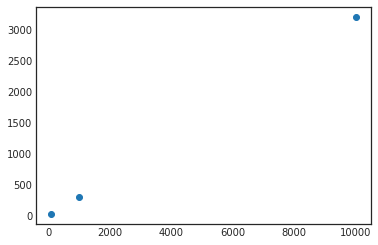

In [40]:
# 1

def g(x):
    return np.dot(x,x)

def rx(N):
    return np.random.uniform(-1.0,1.0, N)

Ns = [10**2, 10**3, 10**4]

res = [0,0,0]

for idx, N in enumerate(Ns):
    res[idx] = np.average([np.min([g(rx(N)) for _ in range(N)]) for _ in range(10)])

plt.plot(Ns,res,"o")

plt.show()

In [41]:
# 2
def randomOpt(Nreps,rDirs , dim, iPoint, fun, alpha):
    points = []
    rVals = []
    cand = iPoint
    for _ in range(Nreps):
        points.append(cand)
        rVals.append(fun(cand))
        dirs = [rx(dim) for _ in range(rDirs)]
        dirs = [alpha*(d/np.sqrt(np.dot(d,d))) for d in dirs]
        vals = [fun(cand+d) for d in dirs]
        minVal = np.argmin(vals)
        cand = cand+ dirs[minVal]
    points.append(cand)
    rVals.append(fun(cand))
    return points, rVals

[ 2.          1.57358215  1.2194483   0.87426111  0.51906689  0.171779
 -0.18051415 -0.53090286 -0.88015006] [ 2.          1.73891033  1.38593835  1.02421221  0.6723073   0.31259752
 -0.04221163 -0.39890163 -0.75670939] [3.5999999999999748, 2.999999999993802, 2.999999998225853, 2.9999994929415776, 2.9998548755453327, 2.9593357785991143, 1.2881604820788959, 1.0011757174263756, 1.0000041114678648]


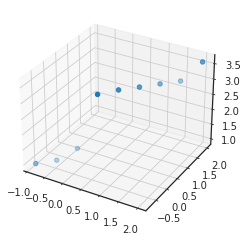

In [42]:

#  3
def fun(x):
    return np.tanh(4*(x[0]+x[1]))+max((0.4*x[0]*x[0]),1) + 1

points, values = randomOpt(8,100,2,[2.,2.],fun, 0.5)
points = np.array(points)

ax = plt.axes(projection='3d')
print(points[:,0], points[:,1], values)
ax.scatter3D(points[:,0], points[:,1], values)
plt.show()

In [43]:
# 4

def fun(x):
    return 0.25*(x[0]**2 + x[1]**2)-0.5*x[0]*x[1]

def dx(x):
    return 0.5*x[0] - 0.5*x[1]

def dy(x):
    return 0.75*(x[1]**3) - 0.5*x[0]

def revX(x):
    return x[1]

def revY(x):
    return ((1.5)*x[0])**(1./3.)

pt = np.array([2., 2.])

for _ in range(7):
    pt[0] = revX(pt)
    pt[1] = revY(pt)

print(pt)


[1.22556906 1.22501954]


## First Order optimization

1. Implementing the gradient decendent in Python Save the history for:

  a. weight (point values)

  b. the function value 


2. Use 1 to calculate the minimum of the following function:
$$
g(x_1, x_2, x_3) = 0.25\,(x_1^2 + x_2^4 - x_3^2) - 0.5\,x_1\,x_2\,x_3
$$

3. Consider the following function:
$$
g(\mathbf{x}) = \mathbf{x}^T\,\mathbf{C}\,\mathbf{x}
$$
with $C=[[0.5,0],[0,12]]$. What kind of behaviour do you observe when you apply the gradient decendent to find the minimum? Use the following snippet to plot your results. [Contour Plot and Scatter Plots together](https://gist.github.com/fdmatoz/9c7ff1cd342fa28a5a22951df5dfed43)

4. Consider the following function:
$$
g(x) = x^4 + 0.2
$$
using an step size of $\alpha=0.1$. What happens with the value of the function as the algorithm approaches to the minimum of the function? What effects do you observe?

In [44]:
# 1
def gradDesc(reps, fun, init, derivs, alpha):
    pt = init
    res = [pt]
    vals = [fun(pt)]
    for k in range(1,reps+1):
        dirc = np.array([deriv(pt) for deriv in derivs])
        dirc = (dirc*(alpha/k))/np.sqrt(np.dot(dirc,dirc))
        pt = pt - dirc
        res.append(pt)
        vals.append(fun(pt))
    return res,vals

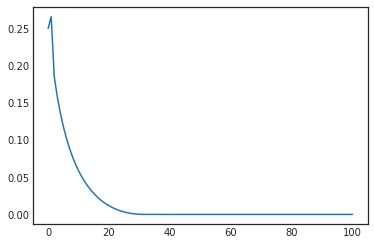

In [45]:
def fun(x):
    return 0.25*(x[0]**2 + x[1]**4 + x[2]**2) - 0.5*(x[0]*x[1]*x[2])

def der1(x):
    return 0.5*x[0] - 0.5* x[1] * x[2]

def der2(x):
    return 1.*x[1] - 0.5* x[0] * x[2]

def der3(x):
    return 0.5*x[2] - 0.5*x[1]*x[2]

r, vals = gradDesc(100, fun, [1.,1.,1.], [der1, der2, der3], 0.5)

plt.plot(vals)
    

/tmp/ipykernel_7155/2835606395.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


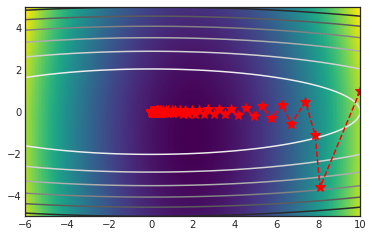

In [46]:
# 3 

def g(x):
    return 0.5*x[0]*x[0] + 12*x[1]*x[1]

def gX(x):
    return x[0]

def gY(x):
    return 24*x[1]

poi,_ = gradDesc(100, g, [10.,1.], [gX,gY], 5)
poi = np.array(poi)

plt.style.use('seaborn-white')

#Function that we wish to plot
f = lambda x,y : g([x,y])

#Range that we wish to plot
xmin, xmax = [-6,10]
ymin, ymax = [-5,5]

#Number of points
Num = 100

#Meshgrid
x = np.linspace(xmin, xmax, Num)
y = np.linspace(ymin, ymax, Num)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)

#Plot
fig, ax = plt.subplots()                   

# Show surface level 
ax.imshow(np.rot90(Z), cmap='viridis',                                                    
          extent=[xmin, xmax, ymin, ymax])

# Add contour lines
plt.contour(X, Y, Z)

# Add scatter/lines
## Here I create some random data you can replace this with your own 
xs = poi[:,0]
ys = poi[:,1]
ax.plot(xs, ys, '--r*', markersize=10) 
ax.set_xlim([xmin, xmax])                                                                           
ax.set_ylim([ymin, ymax])                                                                           
plt.show()

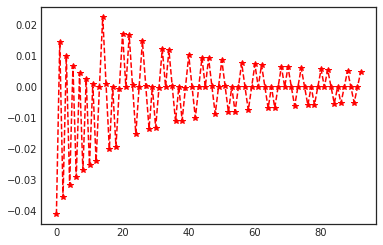

the values begin to oscillate around the minimum


In [47]:
# 4

def g(x):
    return x[0]**4 + 0.2
def dg(x):
    return 4*(x[0]**3)

poi,vals = gradDesc(100, g, [-1.4], [dg], 0.5)

poi = [el[0] for el in poi]

# print(poi)
# print(vals)

plt.plot(poi[8:], '--r*')
plt.show()
print("the values begin to oscillate around the minimum")
